In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

/home/brenda/anaconda3/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/brenda/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/brenda/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/brenda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/brenda/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/brenda/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in sta

In [2]:
data = pd.read_csv('loans.csv')

# Data Exploration

In [3]:
pp.ProfileReport(data)

Number of variables,14
Number of observations,500000
Total Missing (%),0.0%
Total size in memory,53.4 MiB
Average record size in memory,112.0 B
Numeric,11
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,1


In [4]:
data.isnull().sum()

Customer_WID          0
DisbursementDate      0
Age                  11
CustomerType         11
SOR                  11
MonthsSinceOpen      11
MonthsSinceActive    11
FinancialMeasure1    11
FinancialMeasure2    11
FinancialMeasure3    11
FinancialMeasure4    11
CRBScore             11
Amount                0
Default               0
dtype: int64

In [5]:
data.dtypes

Customer_WID           int64
DisbursementDate      object
Age                  float64
CustomerType         float64
SOR                  float64
MonthsSinceOpen      float64
MonthsSinceActive    float64
FinancialMeasure1    float64
FinancialMeasure2    float64
FinancialMeasure3    float64
FinancialMeasure4    float64
CRBScore             float64
Amount               float64
Default                int64
dtype: object

The dataset has 3 data types: int64, object and float64. Some of the variables have been assigned wrong data types, they include: 
1. DisbursmentDate should be  Date
2. CustomerType, SOR and Default should be categorical(object)

# Categorical data

# 1. Default

0    488085
1     11915
Name: Default, dtype: int64
0    0.97617
1    0.02383
Name: Default, dtype: float64


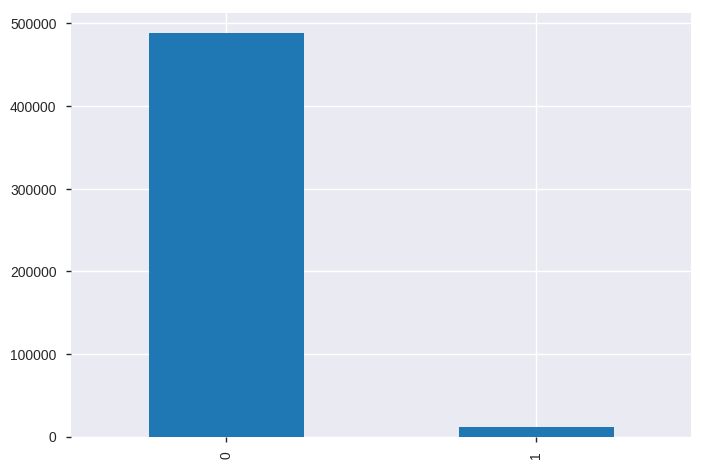

In [6]:
#show percentage distribution and a bar plot to visualize the frequency.
print(data['Default'].value_counts())
print(data['Default'].value_counts(normalize=True))
data['Default'].value_counts().plot.bar()

The above information shows that around 488085 (98%) people did not default while 11915 (2%) defaulted

# 2. CustomerType

In [7]:
#print frequency of unique values 
print(data['CustomerType'].value_counts())

1.0    360347
2.0    139639
3.0         2
0.0         1
Name: CustomerType, dtype: int64


The variable 'Column Type' consists of 4 unique values 1,2,3 and 0 but should only consist of '1' and '2'. Since there are only 2 entries with '3' and one entry with '1' we can do away with these entries. 

In [8]:
#remove the rows with 3 or 0 in the CustomerType column 
data = data[data.CustomerType != 3]
data = data[data.CustomerType != 0]

1.0    0.720714
2.0    0.279286
Name: CustomerType, dtype: float64


Text(0.5,0,'CustomerType')

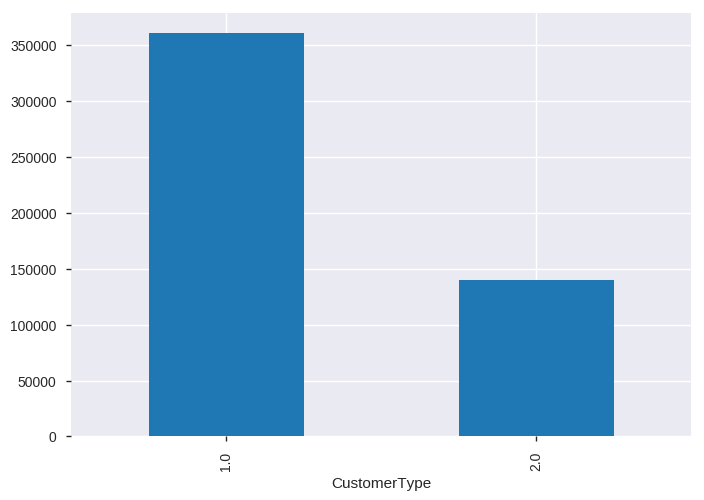

In [9]:
print(data['CustomerType'].value_counts(normalize=True))
data['CustomerType'].value_counts().plot.bar()
plt.xlabel('CustomerType')

The information above shows that 360347 (72%) people are type 1 customers while 139639 (28%) people are type 2 customers

Default              0         1
CustomerType                    
1.0           0.981257  0.018743
2.0           0.963048  0.036952
Default            0     1
CustomerType              
1.0           353593  6754
2.0           134479  5160


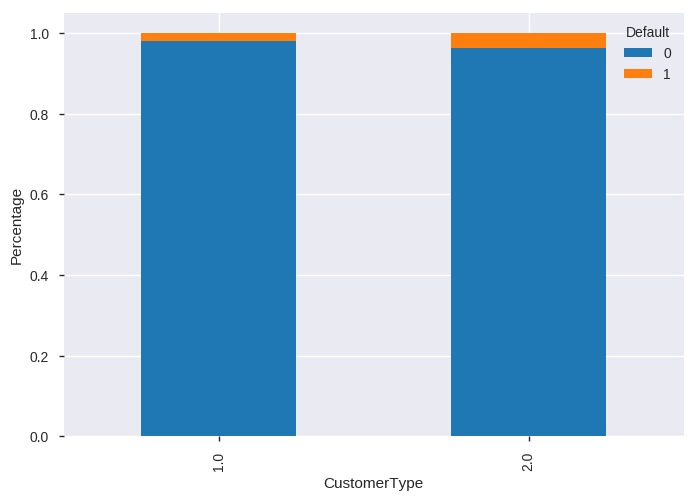

In [10]:
#print the probability ratio of defaulters to non-defaulters for each customer type
print(pd.crosstab(data['CustomerType'],data['Default'], normalize='index'))
#print the number of defaulters to non-defaulters for each customer type
print(pd.crosstab(data['CustomerType'],data['Default']))

CustomerType = pd.crosstab(data['CustomerType'],data['Default'])
CustomerType.div(CustomerType.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True)
plt.xlabel('CustomerType')
p = plt.ylabel('Percentage')

from the plot above we can conclude that most customers are 'type 1'. However, 'type 2' customers are most likely to default than 'type 1' customer

# Ordinal Data 

# 1. SOR

In [11]:
#print frequency distribution of each SOR rating
data['SOR'].value_counts()

5.0    311027
4.0     86345
3.0     51469
6.0     26788
7.0     19889
8.0      4443
2.0        23
0.0         2
Name: SOR, dtype: int64

5.0    311027
4.0     86345
3.0     51469
6.0     26788
7.0     19889
8.0      4443
2.0        23
0.0         2
Name: SOR, dtype: int64


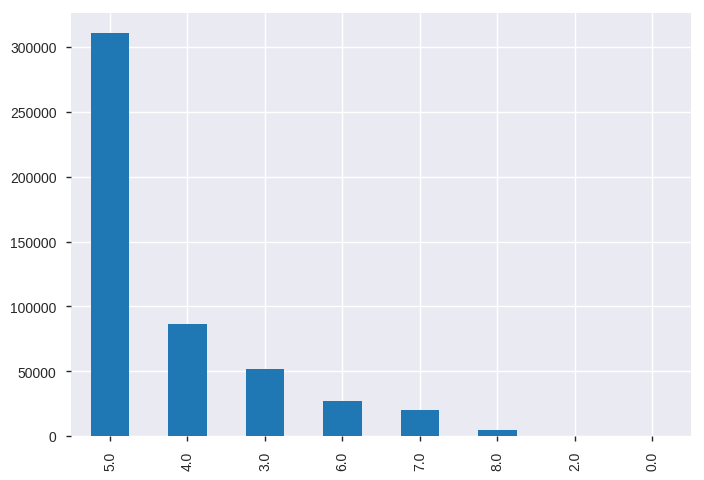

In [12]:
print(data['SOR'].value_counts())
data['SOR'].value_counts().plot.bar()

From the information above we can conclude that most customers have been given a rating of 5 

Default         0         1
SOR                        
0.0      1.000000  0.000000
2.0      1.000000  0.000000
3.0      0.933261  0.066739
4.0      0.950651  0.049349
5.0      0.988937  0.011063
6.0      0.986300  0.013700
7.0      0.981950  0.018050
8.0      0.988521  0.011479
Default       0     1
SOR                  
0.0           2     0
2.0          23     0
3.0       48034  3435
4.0       82084  4261
5.0      307586  3441
6.0       26421   367
7.0       19530   359
8.0        4392    51


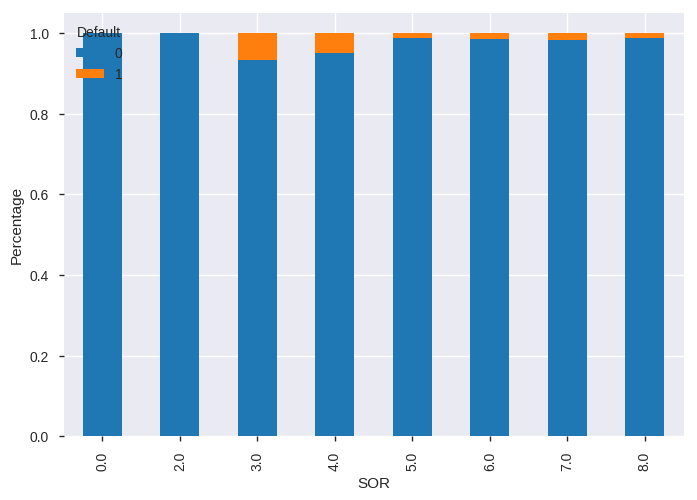

In [13]:
#print the probability ratio of defaulters to non-defaulters for each rating
print(pd.crosstab(data['SOR'],data['Default'], normalize='index'))
#print the number of defaulters to non-defaulters for each rating
print(pd.crosstab(data['SOR'],data['Default']))

SOR = pd.crosstab(data['SOR'],data['Default'])
SOR.div(SOR.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True)
plt.xlabel('SOR')
p = plt.ylabel('Percentage')

Customers with a rating of '3' are most likely to default followed by customers with a rating of '4'

# Numerical Data

# 1. Age

count    499986.000000
mean         37.999616
std          10.986572
min           3.000000
25%          30.000000
50%          36.000000
75%          44.000000
max         118.000000
Name: Age, dtype: float64


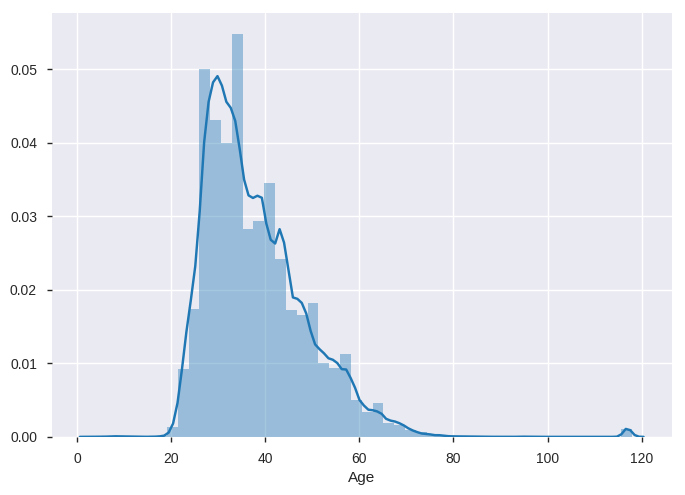

In [14]:
print(data['Age'].describe())
data['Age']=data['Age'].fillna(data['Age'].median())
#distribution plot for the ages of the customers
sns.distplot(data['Age'])

In [15]:
#create age bins
bins = [0,18,40,60,80,100,120]
data['Age_bin'] = pd.cut(data['Age'],bins)

(18, 40]      328231
(40, 60]      154481
(60, 80]       15545
(100, 120]      1250
(0, 18]          291
(80, 100]        199
Name: Age_bin, dtype: int64


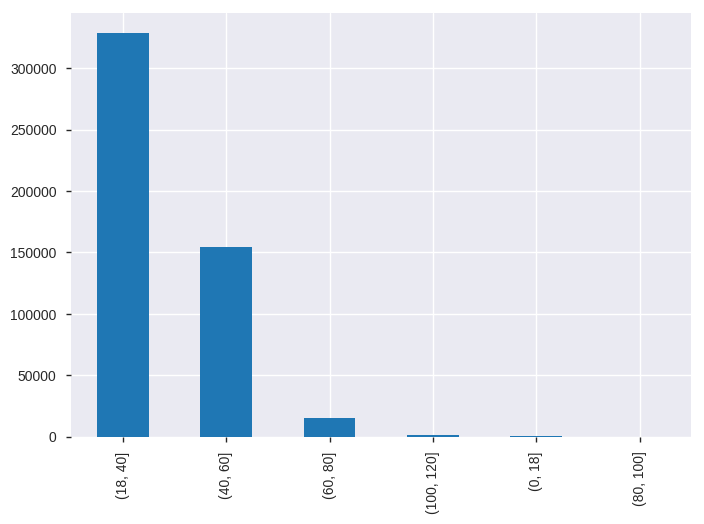

In [16]:
#plot the number of customers in each age bin
print(data['Age_bin'].value_counts())
data['Age_bin'].value_counts().plot.bar()

Default            0         1
Age_bin                       
(0, 18]     0.986254  0.013746
(18, 40]    0.972196  0.027804
(40, 60]    0.983040  0.016960
(60, 80]    0.991830  0.008170
(80, 100]   0.979899  0.020101
(100, 120]  0.973600  0.026400
Default            0         1
Age_bin                       
(0, 18]     0.000574  0.000008
(18, 40]    0.638214  0.018252
(40, 60]    0.303724  0.005240
(60, 80]    0.030836  0.000254
(80, 100]   0.000390  0.000008
(100, 120]  0.002434  0.000066


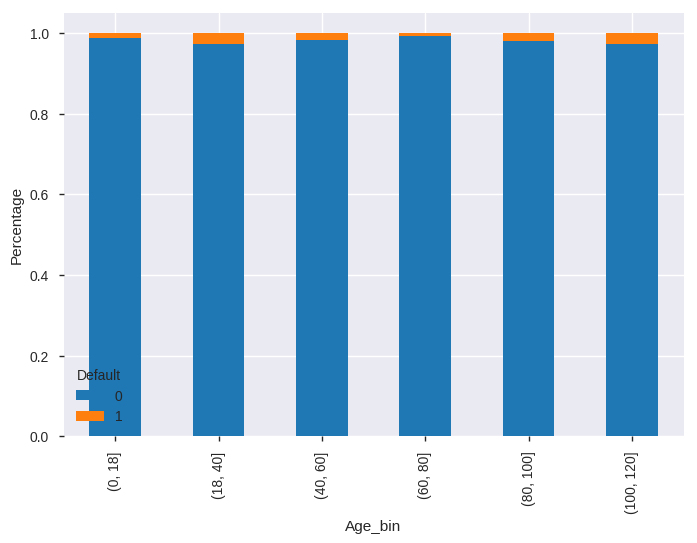

In [17]:
#print the probability ratio of defaulters to non-defaulters within the age bins
print(pd.crosstab(data['Age_bin'],data['Default'], normalize='index'))
#print the number of defaulters to non-defaulters within the age bins
print(pd.crosstab(data['Age_bin'],data['Default'], normalize=True))

Age_bin = pd.crosstab(data['Age_bin'],data['Default'])
Age_bin.div(Age_bin.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True)
plt.xlabel('Age_bin')
p = plt.ylabel('Percentage')

In the 'Age' variable, Many customers who applied for loans are between the age bin of '18 to 40' and the bin with the least number of customers who applied for a loan is '80 to 100'. The age bin of '18 to 40' also has customers who are most likely to default.

# 2. Amount

count    499997.000000
mean       9154.941798
std       16812.633802
min         100.000000
25%        2000.000000
50%        4900.000000
75%        9900.000000
max      200000.000000
Name: Amount, dtype: float64


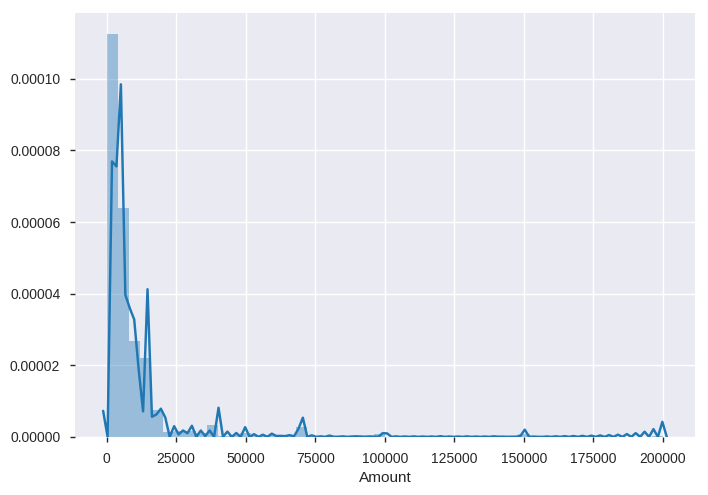

In [18]:
print(data['Amount'].describe())
#distribution plot for the loan amounts
sns.distplot(data['Amount'])

In [19]:
#create bins for the loan amounts
bins = [0,50000,100000,150000,200000]
group = ['Low','Average','High','Very High']
data['amount_bin'] = pd.cut(data['Amount'],bins,labels=group)

Default            0         1
amount_bin                    
Low         0.976291  0.023709
Average     0.970440  0.029560
High        0.983652  0.016348
Very High   0.960184  0.039816
Default          0      1
amount_bin               
Low         474582  11525
Average      10768    328
High          2106     35
Very High      627     26


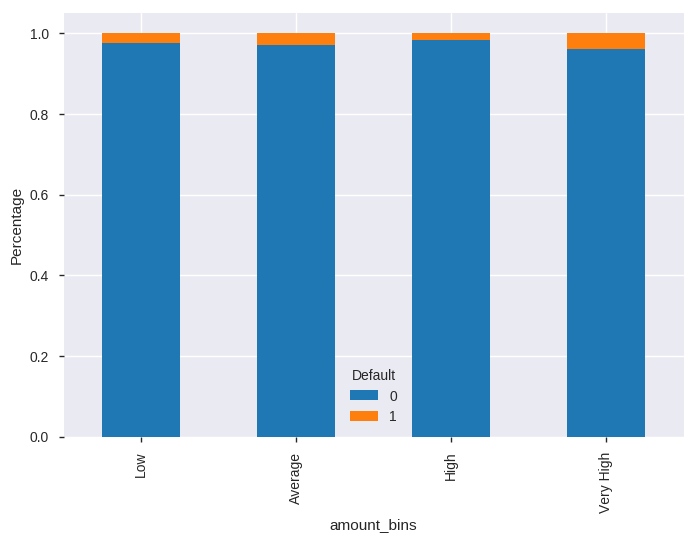

In [20]:
#print the probability ratio of defaulters to non-defaulters in each loan amount bin
print(pd.crosstab(data['amount_bin'],data['Default'], normalize='index'))
#print the number of defaulters to non-defaulters in each loan amount bin
print(pd.crosstab(data['amount_bin'],data['Default']))

amount_bin = pd.crosstab(data['amount_bin'],data['Default'])
amount_bin.div(amount_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True )
plt.xlabel('amount_bins')
p = plt.ylabel('Percentage')

From the plot above we can conclude that most customers applied for  loans within the 0 to 50,000 range. However, customers who applied for higher loans (150,000 to 200,000) have a higher chance of defaulting followed by customers who applied for loans within the 50,000 to the 100,000 range.

# 3. CRBScore

count    499986.000000
mean        586.127380
std         109.543414
min           0.000000
25%         547.000000
50%         603.000000
75%         653.000000
max         747.000000
Name: CRBScore, dtype: float64


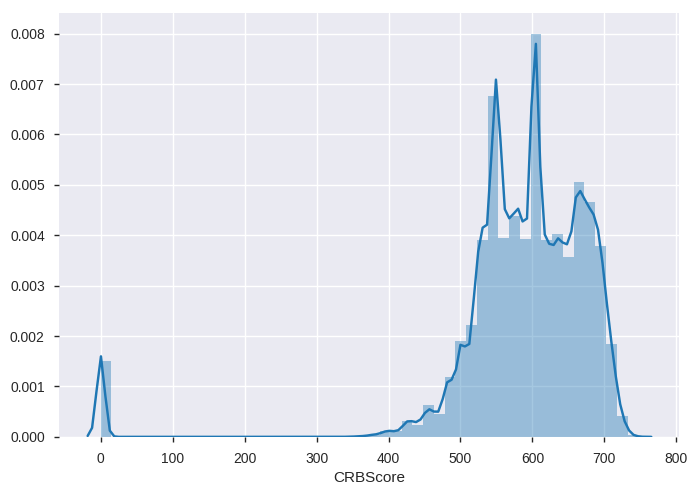

In [21]:
print(data['CRBScore'].describe())
data['CRBScore']=data['CRBScore'].fillna(data['CRBScore'].median())
sns.distplot(data['CRBScore'])

In [22]:
#Create CRB Score bins
bins = [-1,400,900]
group = ['Low','High']
data['CRB_bin'] = pd.cut(data['CRBScore'],bins,labels=group)

Default         0         1
CRB_bin                    
Low      0.961039  0.038961
High     0.976559  0.023441
Default       0      1
CRB_bin               
Low       11988    486
High     476095  11428


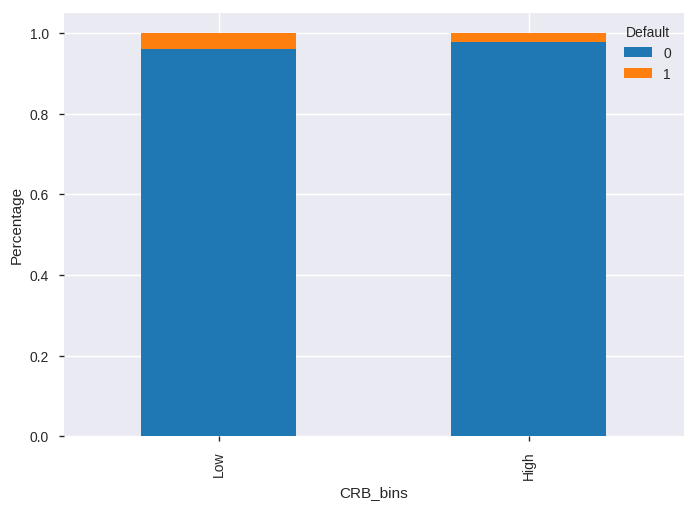

In [23]:
#print the ratio of defaulters to non-defaulters in each CRB Score bin
print(pd.crosstab(data['CRB_bin'],data['Default'], normalize='index'))
#print the number of defaulters to non-defaulters in each CRB Score bin
print(pd.crosstab(data['CRB_bin'],data['Default']))

CRB_bin = pd.crosstab(data['CRB_bin'],data['Default'])
CRB_bin.div(CRB_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True )
plt.xlabel('CRB_bins')
p = plt.ylabel('Percentage')

From the above we can conclude that most customers have a high credit rating (above 400). However, customers with a low credit rating (below 400) are more likely to default than those with a higher credit rating.

# 4. FinancialMeasures

count    4.999860e+05
mean     1.535972e+04
std      3.584064e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.076600e+04
max      2.186055e+06
Name: FinancialMeasure1, dtype: float64


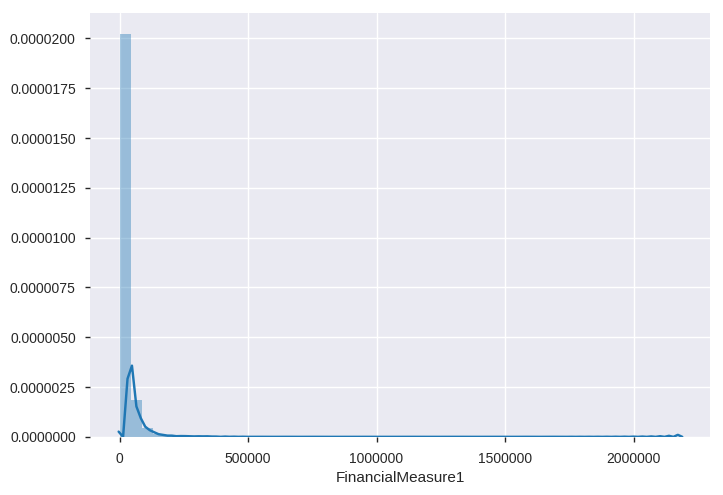

In [24]:
print(data['FinancialMeasure1'].describe())
data['FinancialMeasure1']=data['FinancialMeasure1'].fillna(data['FinancialMeasure1'].median())
sns.distplot(data['FinancialMeasure1'])

count    4.999860e+05
mean     1.190511e+04
std      5.380351e+04
min     -4.523452e+06
25%      7.661125e+02
50%      2.819800e+03
75%      7.417780e+03
max      5.705195e+06
Name: FinancialMeasure2, dtype: float64


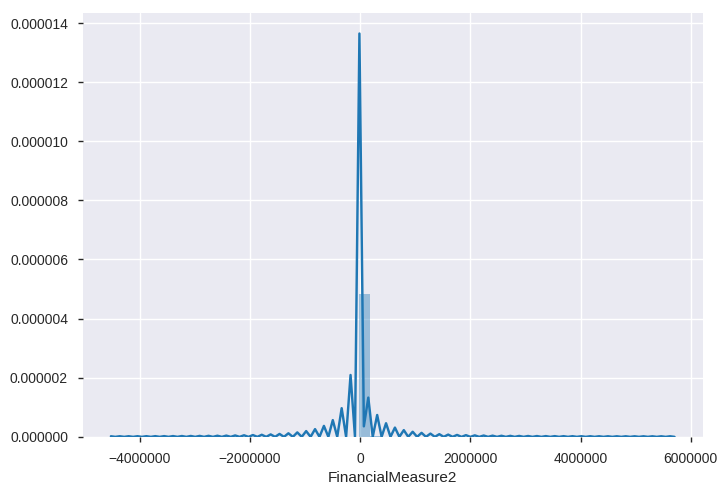

In [25]:
print(data['FinancialMeasure2'].describe())
data['FinancialMeasure2']=data['FinancialMeasure2'].fillna(data['FinancialMeasure2'].median())
sns.distplot(data['FinancialMeasure2'])

count    4.999860e+05
mean     1.009238e+05
std      7.665514e+05
min      0.000000e+00
25%      1.186524e+04
50%      1.939188e+04
75%      3.872731e+04
max      9.747924e+07
Name: FinancialMeasure3, dtype: float64


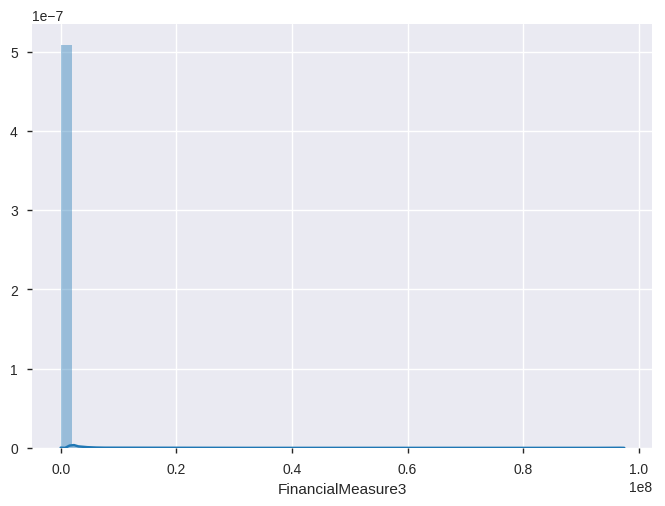

In [26]:
print(data['FinancialMeasure3'].describe())
data['FinancialMeasure3']=data['FinancialMeasure3'].fillna(data['FinancialMeasure3'].median())
sns.distplot(data['FinancialMeasure3'])

count    4.999860e+05
mean     1.018894e+05
std      7.765611e+05
min      0.000000e+00
25%      1.109747e+04
50%      1.861900e+04
75%      3.740180e+04
max      9.467495e+07
Name: FinancialMeasure4, dtype: float64


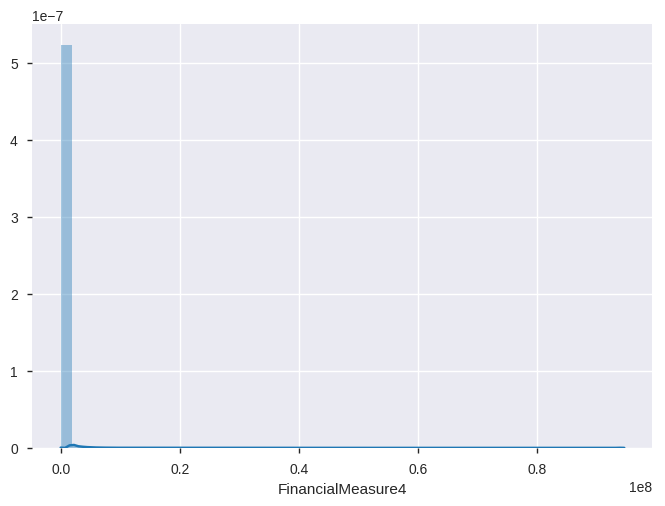

In [27]:
print(data['FinancialMeasure4'].describe())
data['FinancialMeasure4']=data['FinancialMeasure4'].fillna(data['FinancialMeasure4'].median())
sns.distplot(data['FinancialMeasure4'])

# 5. MonthsSinceActive

In [28]:
data['MonthsSinceActive'].describe()

count    499986.000000
mean          0.000004
std           0.002828
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: MonthsSinceActive, dtype: float64

In [29]:
data['MonthsSinceActive'].value_counts()

0.0    499985
2.0         1
Name: MonthsSinceActive, dtype: int64

The dataset contains data for customers who have been active less than a month before the data was collected apart from one who wasn't active 2 months before the data was collected.

# 6. MonthsSinceOpen

In [30]:
data['MonthsSinceOpen'].describe()

count    499986.000000
mean         89.711284
std          33.676018
min           4.000000
25%          65.000000
50%          96.000000
75%         116.000000
max         144.000000
Name: MonthsSinceOpen, dtype: float64

# 7. DisbursementDate

In [31]:
data['DisbursementDate'].describe()

count         499997
unique           273
top       2017-04-18
freq            5574
Name: DisbursementDate, dtype: object

# 8. CustomerWID

In [32]:
data.duplicated(subset='Customer_WID', keep='first').sum()

233015

Some Customers appear in the dataframe more than once. Either the customer applied for more than one loan or the loan application details have been duplicated in the dataset

# Feature Engineering

In [33]:
#Change the data types of DisbursementDate, CustomerType and SOR
data['DisbursementDate']=pd.to_datetime(data['DisbursementDate'])
data['CustomerType']=pd.Categorical(data['CustomerType'])
data['SOR']=pd.Categorical(data['SOR'])

In [34]:
data.isnull().sum()

Customer_WID          0
DisbursementDate      0
Age                   0
CustomerType         11
SOR                  11
MonthsSinceOpen      11
MonthsSinceActive    11
FinancialMeasure1     0
FinancialMeasure2     0
FinancialMeasure3     0
FinancialMeasure4     0
CRBScore              0
Amount                0
Default               0
Age_bin               0
amount_bin            0
CRB_bin               0
dtype: int64

In [35]:
#replace null values for categorical data with the most frequent value in the column and use the median for numerical data
data['CustomerType']=data['CustomerType'].fillna(data['CustomerType'].mode()[0])
data['SOR']=data['SOR'].fillna(data['SOR'].mode()[0])
data['MonthsSinceOpen']=data['MonthsSinceOpen'].fillna(data['MonthsSinceOpen'].median())
data['MonthsSinceActive']=data['MonthsSinceActive'].fillna(data['MonthsSinceActive'].mode()[0])


In [36]:
#check for duplicate rows
data.duplicated(subset=None).sum()

524

In [37]:
#drop the duplicate rows
data=data.drop_duplicates()
data.duplicated(subset=None).sum()

0

In [38]:
#check if any customer has appeared more than once, after removing the duplicate rows
data.duplicated(subset='Customer_WID', keep='first').sum()

232491

In [39]:
#create a columns showing how many loans a customer has applied for 
data['LoanCount'] = data.groupby('Customer_WID')['Customer_WID'].transform('count')
data.head()

,Customer_WID,DisbursementDate,Age,CustomerType,SOR,MonthsSinceOpen,MonthsSinceActive,FinancialMeasure1,FinancialMeasure2,FinancialMeasure3,FinancialMeasure4,CRBScore,Amount,Default,Age_bin,amount_bin,CRB_bin,LoanCount
0,380415,2017-10-13,27.0,1.0,3.0,53.0,0.0,0.0,25.85,7308.66,8885.0,547.0,1000.0,0,"(18, 40]",Low,High,3
1,153249,2017-09-06,54.0,1.0,3.0,142.0,0.0,0.0,12.05,6268.00,3807.0,506.0,2050.0,0,"(40, 60]",Low,High,2
2,82776,2017-09-25,44.0,2.0,5.0,70.0,0.0,0.0,369.04,15475.66,13883.0,554.0,500.0,0,"(40, 60]",Low,High,4
3,190996,2017-06-23,30.0,1.0,5.0,93.0,0.0,0.0,403.01,13294.33,13481.0,569.0,200.0,0,"(18, 40]",Low,High,4
4,375566,2017-08-23,36.0,1.0,5.0,116.0,0.0,39678.0,2143.38,20054.76,19227.4,633.0,7000.0,0,"(18, 40]",Low,High,2


In [40]:
#create a column showing how long a customer has been with the bank to replace the 'MonthsSinceOpen' column
data['CustomerYears']=data['MonthsSinceOpen']/12

In [41]:
data.head()

,Customer_WID,DisbursementDate,Age,CustomerType,SOR,MonthsSinceOpen,MonthsSinceActive,FinancialMeasure1,FinancialMeasure2,FinancialMeasure3,FinancialMeasure4,CRBScore,Amount,Default,Age_bin,amount_bin,CRB_bin,LoanCount,CustomerYears
0,380415,2017-10-13,27.0,1.0,3.0,53.0,0.0,0.0,25.85,7308.66,8885.0,547.0,1000.0,0,"(18, 40]",Low,High,3,4.416667
1,153249,2017-09-06,54.0,1.0,3.0,142.0,0.0,0.0,12.05,6268.00,3807.0,506.0,2050.0,0,"(40, 60]",Low,High,2,11.833333
2,82776,2017-09-25,44.0,2.0,5.0,70.0,0.0,0.0,369.04,15475.66,13883.0,554.0,500.0,0,"(40, 60]",Low,High,4,5.833333
3,190996,2017-06-23,30.0,1.0,5.0,93.0,0.0,0.0,403.01,13294.33,13481.0,569.0,200.0,0,"(18, 40]",Low,High,4,7.750000
4,375566,2017-08-23,36.0,1.0,5.0,116.0,0.0,39678.0,2143.38,20054.76,19227.4,633.0,7000.0,0,"(18, 40]",Low,High,2,9.666667


In [42]:
data['Applicationfee']=data['Amount']*0.05
data.head()

,Customer_WID,DisbursementDate,Age,CustomerType,SOR,MonthsSinceOpen,MonthsSinceActive,FinancialMeasure1,FinancialMeasure2,FinancialMeasure3,FinancialMeasure4,CRBScore,Amount,Default,Age_bin,amount_bin,CRB_bin,LoanCount,CustomerYears,Applicationfee
0,380415,2017-10-13,27.0,1.0,3.0,53.0,0.0,0.0,25.85,7308.66,8885.0,547.0,1000.0,0,"(18, 40]",Low,High,3,4.416667,50.0
1,153249,2017-09-06,54.0,1.0,3.0,142.0,0.0,0.0,12.05,6268.00,3807.0,506.0,2050.0,0,"(40, 60]",Low,High,2,11.833333,102.5
2,82776,2017-09-25,44.0,2.0,5.0,70.0,0.0,0.0,369.04,15475.66,13883.0,554.0,500.0,0,"(40, 60]",Low,High,4,5.833333,25.0
3,190996,2017-06-23,30.0,1.0,5.0,93.0,0.0,0.0,403.01,13294.33,13481.0,569.0,200.0,0,"(18, 40]",Low,High,4,7.750000,10.0
4,375566,2017-08-23,36.0,1.0,5.0,116.0,0.0,39678.0,2143.38,20054.76,19227.4,633.0,7000.0,0,"(18, 40]",Low,High,2,9.666667,350.0


In [43]:
#create column showing the interest to be paid for the loan
data['Interest'] = data['Amount']*0.13*1/12

In [44]:
data.head()

,Customer_WID,DisbursementDate,Age,CustomerType,SOR,MonthsSinceOpen,MonthsSinceActive,FinancialMeasure1,FinancialMeasure2,FinancialMeasure3,...,CRBScore,Amount,Default,Age_bin,amount_bin,CRB_bin,LoanCount,CustomerYears,Applicationfee,Interest
0,380415,2017-10-13,27.0,1.0,3.0,53.0,0.0,0.0,25.85,7308.66,...,547.0,1000.0,0,"(18, 40]",Low,High,3,4.416667,50.0,10.833333
1,153249,2017-09-06,54.0,1.0,3.0,142.0,0.0,0.0,12.05,6268.00,...,506.0,2050.0,0,"(40, 60]",Low,High,2,11.833333,102.5,22.208333
2,82776,2017-09-25,44.0,2.0,5.0,70.0,0.0,0.0,369.04,15475.66,...,554.0,500.0,0,"(40, 60]",Low,High,4,5.833333,25.0,5.416667
3,190996,2017-06-23,30.0,1.0,5.0,93.0,0.0,0.0,403.01,13294.33,...,569.0,200.0,0,"(18, 40]",Low,High,4,7.750000,10.0,2.166667
4,375566,2017-08-23,36.0,1.0,5.0,116.0,0.0,39678.0,2143.38,20054.76,...,633.0,7000.0,0,"(18, 40]",Low,High,2,9.666667,350.0,75.833333


In [45]:
#create a column showing the total amount to be paid by the customer
data['Repayment']=data['Amount']+data['Interest']
data.head()

,Customer_WID,DisbursementDate,Age,CustomerType,SOR,MonthsSinceOpen,MonthsSinceActive,FinancialMeasure1,FinancialMeasure2,FinancialMeasure3,...,Amount,Default,Age_bin,amount_bin,CRB_bin,LoanCount,CustomerYears,Applicationfee,Interest,Repayment
0,380415,2017-10-13,27.0,1.0,3.0,53.0,0.0,0.0,25.85,7308.66,...,1000.0,0,"(18, 40]",Low,High,3,4.416667,50.0,10.833333,1010.833333
1,153249,2017-09-06,54.0,1.0,3.0,142.0,0.0,0.0,12.05,6268.00,...,2050.0,0,"(40, 60]",Low,High,2,11.833333,102.5,22.208333,2072.208333
2,82776,2017-09-25,44.0,2.0,5.0,70.0,0.0,0.0,369.04,15475.66,...,500.0,0,"(40, 60]",Low,High,4,5.833333,25.0,5.416667,505.416667
3,190996,2017-06-23,30.0,1.0,5.0,93.0,0.0,0.0,403.01,13294.33,...,200.0,0,"(18, 40]",Low,High,4,7.750000,10.0,2.166667,202.166667
4,375566,2017-08-23,36.0,1.0,5.0,116.0,0.0,39678.0,2143.38,20054.76,...,7000.0,0,"(18, 40]",Low,High,2,9.666667,350.0,75.833333,7075.833333


In [46]:
data['DisbursementDate'].describe()

count                  499473
unique                    273
top       2017-04-18 00:00:00
freq                     5536
first     2017-01-03 00:00:00
last      2017-11-30 00:00:00
Name: DisbursementDate, dtype: object

In [47]:
#create a column with the due date of the loan which is one month from the disbursement date.
data['period']=1
data['DueDate']=data['DisbursementDate'] + data['period'].astype("timedelta64[M]")
data['DueDate'] = pd.to_datetime(data['DueDate']).dt.date

In [48]:
data.drop('period', axis=1, inplace=True)
data.head()

,Customer_WID,DisbursementDate,Age,CustomerType,SOR,MonthsSinceOpen,MonthsSinceActive,FinancialMeasure1,FinancialMeasure2,FinancialMeasure3,...,Default,Age_bin,amount_bin,CRB_bin,LoanCount,CustomerYears,Applicationfee,Interest,Repayment,DueDate
0,380415,2017-10-13,27.0,1.0,3.0,53.0,0.0,0.0,25.85,7308.66,...,0,"(18, 40]",Low,High,3,4.416667,50.0,10.833333,1010.833333,2017-11-12
1,153249,2017-09-06,54.0,1.0,3.0,142.0,0.0,0.0,12.05,6268.00,...,0,"(40, 60]",Low,High,2,11.833333,102.5,22.208333,2072.208333,2017-10-06
2,82776,2017-09-25,44.0,2.0,5.0,70.0,0.0,0.0,369.04,15475.66,...,0,"(40, 60]",Low,High,4,5.833333,25.0,5.416667,505.416667,2017-10-25
3,190996,2017-06-23,30.0,1.0,5.0,93.0,0.0,0.0,403.01,13294.33,...,0,"(18, 40]",Low,High,4,7.750000,10.0,2.166667,202.166667,2017-07-23
4,375566,2017-08-23,36.0,1.0,5.0,116.0,0.0,39678.0,2143.38,20054.76,...,0,"(18, 40]",Low,High,2,9.666667,350.0,75.833333,7075.833333,2017-09-22
